## Домашнее задание к лекции «Feature Selection»

1. Взять датасет.
2. Провести EDA
3. Построить зависимость между качеством модели и количеством отобранных признаков. Т.е. надо обучать модель на количестве признаков от одного до максимально возможного.
4. Для отбора признаков использовать следующие подходы:
* корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции
* отбор признаков на основе Information Value (см. статью)
* отбор признаков на основе feature_impotance от алгоритма RandomForest
* жадный отбор признаков по максимальному нарастанию качества модели
* жадное отбрасывание признаков по минимальному падению качества модели

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_covtype

In [3]:
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
random_state = 42

In [5]:
cov = fetch_covtype()
cov_data = pd.DataFrame(cov.data)
cov_target = pd.DataFrame(cov.target)

In [6]:
cov_data

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cov_target.columns = ['target']
cov_target

,target
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


In [8]:
data = pd.concat([cov_data, cov_target], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


#### 1. Корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции

1. Посмотрим на матрицу корреляции признаков Т.к. признаков много, то матрица визуально не информативна. Поэтому смотреть зависимости между конкретными переменными на графиках pairplot не имеет смысла.


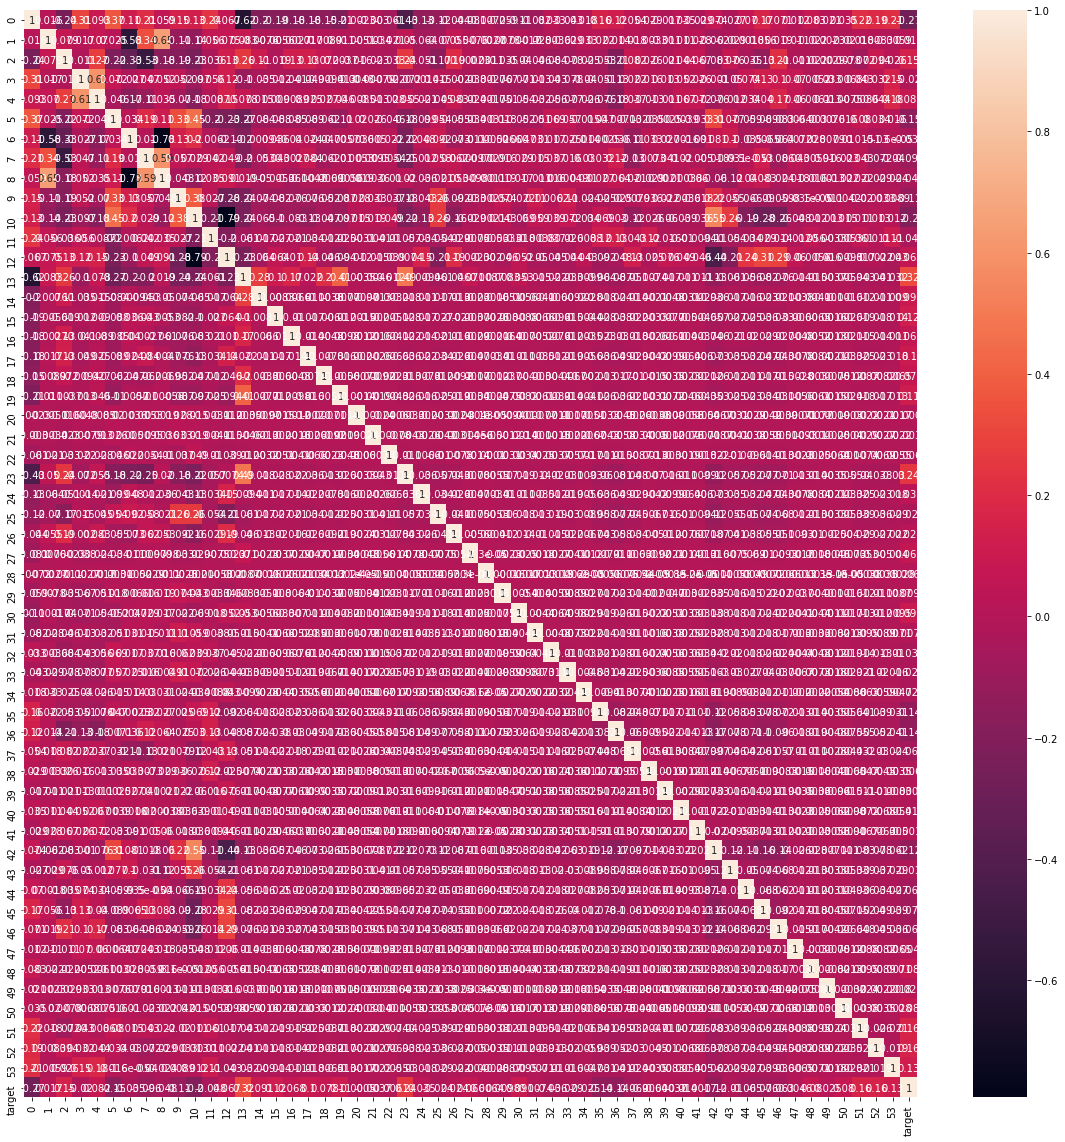

In [9]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

2. Построим модель на основе деревьев решений, и посмотрим важность признаков, которую она нам вернет. 

In [10]:
n = 50000
X = cov_data.head(n) # dataframe --> массив numpy
Y = cov_target.head(n)
# извлечение признаков
model = ExtraTreesClassifier()
model.fit(X, Y.values.ravel()) # обучение
for i in range(cov_data.shape[1]):
    print(f"{i}\t- {model.feature_importances_[i]:.4f}")

0	- 0.1400
1	- 0.0421
2	- 0.0336
3	- 0.0563
4	- 0.0568
5	- 0.1033
6	- 0.0375
7	- 0.0407
8	- 0.0369
9	- 0.1346
10	- 0.0618
11	- 0.0026
12	- 0.0315
13	- 0.0500
14	- 0.0011
15	- 0.0043
16	- 0.0114
17	- 0.0075
18	- 0.0007
19	- 0.0027
20	- 0.0000
21	- 0.0000
22	- 0.0001
23	- 0.0172
24	- 0.0019
25	- 0.0114
26	- 0.0040
27	- 0.0009
28	- 0.0000
29	- 0.0042
30	- 0.0049
31	- 0.0026
32	- 0.0021
33	- 0.0041
34	- 0.0002
35	- 0.0039
36	- 0.0162
37	- 0.0039
38	- 0.0000
39	- 0.0004
40	- 0.0001
41	- 0.0001
42	- 0.0118
43	- 0.0104
44	- 0.0016
45	- 0.0027
46	- 0.0021
47	- 0.0002
48	- 0.0019
49	- 0.0001
50	- 0.0007
51	- 0.0148
52	- 0.0125
53	- 0.0078


Для построения модели линейной регрессии возмем вначале один признак с максимальным коэффициентом корреляции: "9" - 0.1458

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
data.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51,       52,       53, 'target'],
      dtype='object')

In [13]:
X1 = data[[9]]
y1 = data['target']

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)

In [15]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [16]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model1.score(X1_train, y1_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model1.score(X1_test, y1_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.01169898843437811
качество работы модели на тествой выборке       - 0.012256093593793205


Добавим в нашу модель признаки, у которых коэффициент корреляции больше 0,02:
* 9	- 0.1458
* 0	- 0.1368
* 5	- 0.1051
* 10 - 0.0636
* 4 - 0.0555
* 3 - 0.0548
* 1 - 0.0420
* 7 - 0.0410
* 13 - 0.0396
* 6 - 0.0382
* 8 - 0.0364
* 2 - 0.0341
* 12 - 0.0255
* 23 - 0.0212


In [17]:
X2 = data[[9, 0, 5, 10, 4, 3, 1, 7, 13, 6, 8, 2, 12, 23]]
y2 = data['target']

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [19]:
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

LinearRegression()

In [20]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model2.score(X2_train, y2_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model2.score(X2_test, y2_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.14503599458943506
качество работы модели на тествой выборке       - 0.1452819948687547


#### 2. Метод фильтрации (filter methods)
Вычисляет уменьшение энтропии в результате преобразования набора данных. Его можно использовать для отбора признаков путем оценки информационного прироста каждой переменной в контексте целевой переменной.

In [21]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

In [22]:
n = 10000
X = cov_data.head(n)
y = cov_target.head(n)

In [23]:
importances = mutual_info_classif(X, y.values.ravel())

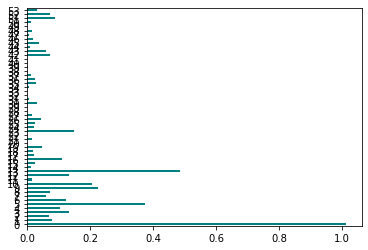

In [24]:
# Где data - датасет; X, y – входные и выходные данные соответственно
feature_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])
feature_importances.plot(kind='barh', color='teal')
plt.show()

На графике видно, что наибольшее значение (>0.1) имеют признаки 0, 1, 3, 4, 5, 6, 9, 10, 12, 13, 16, 25, 43, 52. Построим модель линейной регрессии с этими признаками.

In [25]:
X3 = data[[0, 1, 3, 4, 5, 6, 9, 10, 12, 13, 16, 25, 43, 52]]
y3 = data['target']

In [26]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

In [27]:
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

LinearRegression()

In [28]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model3.score(X3_train, y3_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model3.score(X3_test, y3_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.1773039729396919
качество работы модели на тествой выборке       - 0.17775142009485057


#### 3. Метод с использованием Случайного Леса (Random Forest Importance)
Стратегии на основе дерева, используемые случайными лесами, естественным образом ранжируются по тому, насколько хорошо они улучшают чистоту модели в плане данных. Таким образом, “обрезая” деревья ниже определенного коэффициента, мы можем подобрать наиболее важные признаки.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
n = 5000
X = cov_data.head(n)
y = cov_target.head(n)

<AxesSubplot:>

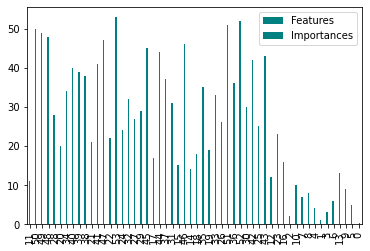

In [31]:
# создаем случайное дерево с нашими параметрами
model = RandomForestClassifier(n_estimators=340)

# Обучаем модель:
model.fit(X, y.values.ravel())

# Подбираем самые важные признаки
importances = model.feature_importances_

# Создаем отдельный датасет для визуализации
final_df = pd.DataFrame({"Features" : pd.DataFrame(X).columns, "Importances" : importances})
final_df.set_index('Importances')

# Сортируем их по возрастанию для лучшей визуализации
final_df = final_df.sort_values('Importances')

# Выводим на график

final_df.plot.bar(color = 'teal')

In [32]:
final_df

,Features,Importances
11,11,0.000000
50,50,0.000000
49,49,0.000000
48,48,0.000000
28,28,0.000000
20,20,0.000000
34,34,0.000000
40,40,0.000000
39,39,0.000000
38,38,0.000000


Наибольшую важность (>0.01) при данном методе показали признаки 43, 12, 23, 16, 2, 10, 8, 7, 4, 1, 3, 6, 13, 9, 5, 0. Построим модель линейной регрессии с этими признаками.

In [33]:
X4 = data[[43, 12, 23, 16, 2, 10, 8, 7, 4, 1, 3, 6, 13, 9, 5, 0]]
y4 = data['target']

In [34]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, random_state=42)

In [35]:
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

LinearRegression()

In [36]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model4.score(X4_train, y4_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model4.score(X4_test, y4_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.14572600047245576
качество работы модели на тествой выборке       - 0.14602679486033043


#### 4. Регуляризация LASSO (L1)
Регуляризация состоит в добавлении штрафа (penalty) к различным параметрам модели во избежание чрезмерной подгонки. При регуляризации линейной модели штраф применяется к коэффициентам, умножающим каждый из предикторов. Lasso-регуляризация обладает свойством, позволяющим уменьшить некоторые коэффициенты до нуля. Следовательно, такие “фичи” можно будет просто удалить из модели.

In [37]:
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [38]:
n = 10000
X = cov_data.head(n)
y = cov_target.head(n)

In [39]:
X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

In [40]:
list_l=list(2**np.linspace(-10,10,200))

In [41]:
# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i])
    m_l.fit(X_sc, y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

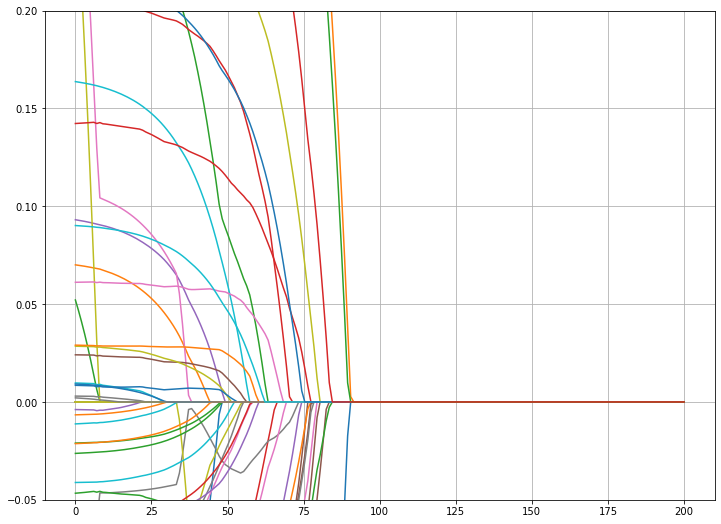

In [42]:
# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)
plt.grid()

Обучим модель на отобранных признаках

In [43]:
X5 = data[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 16, 23, 25, 43, 52]]
y5 = data['target']

In [44]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.30, random_state=42)

In [45]:
model5 = LinearRegression()
model5.fit(X5_train, y5_train)

LinearRegression()

In [46]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model5.score(X5_train, y5_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model5.score(X5_test, y5_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.18297864925355933
качество работы модели на тествой выборке       - 0.18283464358020718


#### 5. "Жадные" алгоритмы
Процесс выбора функции основан на конкретном алгоритме машинного обучения, который мы используем. Он следует подходу жадного поиска, оценивая все возможные комбинации функций по определенному критерию. Методы оболочки обычно обеспечивают лучшую точность прогнозирования чем методы фильтрации.

In [47]:
n = 5000
X = cov_data.head(n)
y = cov_target.head(n)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

##### Прямой отбор признаков
Это крайне прямолинейный метод, в котором мы начинаем с наиболее эффективной переменной по отношению к цели. Затем мы выбираем другую переменную, которая дает лучшую производительность в сочетании с первой. Этот процесс продолжается до тех пор, пока не будет достигнут заданный критерий.

In [49]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

In [50]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, max_iter=50)
ffs = SequentialFeatureSelector(lr, k_features='best', forward = True)

In [51]:
ffs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(class_weight='balanced',
                                                       max_iter=50,
                                                       random_state=42),
                          k_features='best')

In [52]:
# X, y – входные и выходные данные соответственно.
# X_train – входные данные с обучающейся выборки,
# y_pred – выходные данные предиктора
features = list(ffs.k_feature_names_)
features = list(map(int, features))

In [53]:
np.intersect1d(X_train.columns, features)

array([ 0, 11, 15, 18, 20, 21, 22, 23, 24, 25, 28, 29, 31, 32, 33, 34, 35,
       37, 38, 39, 40, 41, 45, 46, 47, 48, 49, 50, 51, 53], dtype=int64)

In [54]:
lr.fit(X_train[np.intersect1d(X_train.columns, features)], y_train)

LogisticRegression(class_weight='balanced', max_iter=50, random_state=42)

Обучим модель на отобранных признаках

In [55]:
X6 = data[[0, 11, 15, 18, 20, 21, 22, 23, 24, 25, 28, 29, 31, 32, 33, 34, 35,
       37, 38, 39, 40, 41, 45, 46, 47, 48, 49, 50, 51, 53]]
y6 = data['target']

In [56]:
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.30, random_state=42)

In [57]:
model6 = LinearRegression()
model6.fit(X6_train, y6_train)

LinearRegression()

In [58]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model6.score(X6_train, y6_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model6.score(X6_test, y6_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.21809222151442098
качество работы модели на тествой выборке       - 0.21558788095485493


##### Последовательный отбор признаков
Этот метод работает прямо противоположно методу прямого выбора характеристик. Здесь мы начинаем со всех доступных функций и строим модель. Затем мы используем переменную из модели, которая дает наилучшее значение меры оценки. Этот процесс продолжается до тех пор, пока не будет достигнут заданный критерий.

In [59]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

In [60]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, max_iter=50)

In [61]:
lr.fit(X, y)

LogisticRegression(class_weight='balanced', max_iter=50, random_state=42)

In [62]:
bfs = SequentialFeatureSelector(lr, k_features='best', forward = False, n_jobs=-1)
bfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(class_weight='balanced',
                                                       max_iter=50,
                                                       random_state=42),
                          forward=False, k_features='best', n_jobs=-1)

In [63]:
features = list(bfs.k_feature_names_)
features = list(map(int, features))

In [64]:
np.intersect1d(X_train.columns, features)

array([ 0,  1,  2,  3,  4,  6,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53],
      dtype=int64)

In [65]:
lr.fit(X_train[np.intersect1d(X_train.columns, features)], y_train)

LogisticRegression(class_weight='balanced', max_iter=50, random_state=42)

In [66]:
y_pred = lr.predict(X_train[features])
y_pred

array([5, 3, 4, ..., 4, 6, 6])

Обучим модель на отобранных признаках

In [67]:
X7 = data[np.intersect1d(X_train.columns, features)]
y7 = data['target']

In [68]:
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.30, random_state=42)

In [69]:
model7 = LinearRegression()
model7.fit(X7_train, y7_train)

LinearRegression()

In [70]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model7.score(X7_train, y7_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model7.score(X7_test, y7_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.3193445426236019
качество работы модели на тествой выборке       - 0.3157856560048212


##### Рекурсивное исключение признаков
Сначала модель обучается на начальной выборке признаков, и важность каждой функции определяется либо с помощью атрибута coef_ или feature_importances_. Затем наименее важные “фичи” удаляются из текущего набора. Процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество признаков для выбора.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [72]:
n = 10000
X = cov_data.head(n)
y = cov_target.head(n)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42, max_iter=50)

In [75]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=50, random_state=42)

In [76]:
rfe = RFE(lr, n_features_to_select=7)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(class_weight='balanced', max_iter=50,
                                 random_state=42),
    n_features_to_select=7)

In [77]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [78]:
features_new = [a*b for a,b in zip([int(elem) for elem in rfe.support_], list(range(1, 54)))]
features_new = [i for i in features_new if i != 0]
features_new = [i-1 for i in features_new]
features_new

[0, 1, 2, 4, 6, 7, 8]

In [79]:
y_pred = rfe.predict(X_train)
y_pred

array([7, 3, 2, ..., 5, 2, 7])

Обучим модель на отобранных признаках

In [80]:
X8 = data[[0, 1, 2, 4, 6, 7, 8]]
y8 = data['target']

In [81]:
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.30, random_state=42)

In [82]:
model8 = LinearRegression()
model8.fit(X8_train, y8_train)

LinearRegression()

In [83]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model8.score(X8_train, y8_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model8.score(X8_test, y8_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.08894611279949838
качество работы модели на тествой выборке       - 0.09083674613699566


Построим теперь нашу модель на максимальном количестве отобранных признаков всеми методами.

In [84]:
X = data[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 20, 21, 22, 23, 24, 25, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53]]
y = data['target']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [86]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [87]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model.score(X_train, y_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model.score(X_test, y_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.30528674923741783
качество работы модели на тествой выборке       - 0.3013641251106097


Рассмотрим скоры полученных моделей

на тренировочных выборках

In [88]:
print(f"{'качество модели с 1 признаком на тренировочной выборке' :<60} - {model1.score(X1_train, y1_train)}",
      f"{'качество модели с 14 признаками, отобранными корреляцией' :<60} - {model2.score(X2_train, y2_train)}",
      f"{'качество модели с 14 признаками, отобранными методом фильтрации' :<60} - {model3.score(X3_train, y3_train)}",
      f"{'качество модели с 16 признаками, отобранными Random Forest Importance' :<60} - {model4.score(X4_train, y4_train)}",
      f"{'качество модели с 18 признаками, отобранными L1' :<60} - {model5.score(X5_train, y5_train)}",
      f"{'качество модели с 30 признаками, отобранными жадным (прямым) отбором' :<60} - {model6.score(X6_train, y6_train)}",
      f"{'качество модели с 30 признаками, отобранными жадным (последовательным) отбором' :<60} - {model7.score(X7_train, y7_train)}",
      f"{'качество модели с 7 признаками, отобранными рекурсивным исключением признаков' :<60} - {model8.score(X8_train, y8_train)}",
      f"{'качество модели с max количеством признаков' :<60} - {model.score(X_train, y_train)}",
      sep='\n')

качество модели с 1 признаком на тренировочной выборке       - 0.01169898843437811
качество модели с 14 признаками, отобранными корреляцией     - 0.14503599458943506
качество модели с 14 признаками, отобранными методом фильтрации - 0.1773039729396919
качество модели с 16 признаками, отобранными Random Forest Importance - 0.14572600047245576
качество модели с 18 признаками, отобранными L1              - 0.18297864925355933
качество модели с 30 признаками, отобранными жадным (прямым) отбором - 0.21809222151442098
качество модели с 30 признаками, отобранными жадным (последовательным) отбором - 0.3193445426236019
качество модели с 7 признаками, отобранными рекурсивным исключением признаков - 0.08894611279949838
качество модели с max количеством признаков                  - 0.30528674923741783


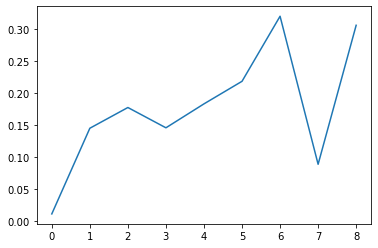

In [89]:
data_train = np.array([model1.score(X1_train, y1_train),
                model2.score(X2_train, y2_train),
                model3.score(X3_train, y3_train),
                model4.score(X4_train, y4_train),
                model5.score(X5_train, y5_train),      
                model6.score(X6_train, y6_train),
                model7.score(X7_train, y7_train),       
                model8.score(X8_train, y8_train),       
                model.score(X_train, y_train)])
plt.plot(data_train)
plt.show()

И на тестовых выборках

In [90]:
print(f"{'качество модели с 1 признаком на тестовой выборке' :<60} - {model1.score(X1_test, y1_test)}",
      f"{'качество модели с 14 признаками, отобранными корреляцией' :<60} - {model2.score(X2_test, y2_test)}",
      f"{'качество модели с 14 признаками, отобранными методом фильтрации' :<60} - {model3.score(X3_test, y3_test)}",
      f"{'качество модели с 16 признаками, отобранными Random Forest Importance' :<60} - {model4.score(X4_test, y4_test)}",
      f"{'качество модели с 18 признаками, отобранными L1' :<60} - {model5.score(X5_test, y5_test)}",
      f"{'качество модели с 30 признаками, отобранными жадным (прямым) отбором' :<60} - {model6.score(X6_test, y6_test)}",
      f"{'качество модели с 30 признаками, отобранными жадным (последовательным) отбором' :<60} - {model7.score(X7_test, y7_test)}",
      f"{'качество модели с 7 признаками, отобранными рекурсивным исключением признаков' :<60} - {model8.score(X8_test, y8_test)}",
      f"{'качество модели с max количеством признаков' :<60} - {model.score(X_test, y_test)}",
      sep='\n')

качество модели с 1 признаком на тестовой выборке            - 0.012256093593793205
качество модели с 14 признаками, отобранными корреляцией     - 0.1452819948687547
качество модели с 14 признаками, отобранными методом фильтрации - 0.17775142009485057
качество модели с 16 признаками, отобранными Random Forest Importance - 0.14602679486033043
качество модели с 18 признаками, отобранными L1              - 0.18283464358020718
качество модели с 30 признаками, отобранными жадным (прямым) отбором - 0.21558788095485493
качество модели с 30 признаками, отобранными жадным (последовательным) отбором - 0.3157856560048212
качество модели с 7 признаками, отобранными рекурсивным исключением признаков - 0.09083674613699566
качество модели с max количеством признаков                  - 0.3013641251106097


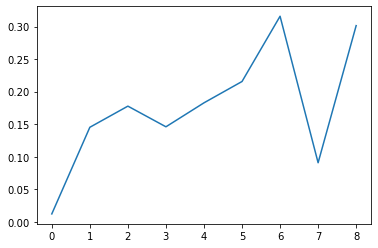

In [91]:
data_test = np.array([model1.score(X1_test, y1_test),
                model2.score(X2_test, y2_test),
                model3.score(X3_test, y3_test),
                model4.score(X4_test, y4_test),
                model5.score(X5_test, y5_test),      
                model6.score(X6_test, y6_test),
                model7.score(X7_test, y7_test),       
                model8.score(X8_test, y8_test),       
                model.score(X_test, y_test)])
plt.plot(data_test)
plt.show()

Заметим, что результаты линейной регрессии улучшаются при добавлении параметров.
При отборе признаков лучше всего показали себя "жадные" алгоритмы. 